In [2]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a=ldata("yeast_AP-MS.txt")
b=ldata("yeast_LIT.txt")
d=ldata("yeast_Y2H.txt")

# print("(a) Red Yeast Y2H")
# G = nx.Graph()
# G.add_edges_from(a)
# nx.draw(G, node_size=5)
# plt.show()

G = nx.Graph()
G.add_edges_from(a)

H = nx.Graph()
H.add_edges_from(b)

J = nx.Graph()
J.add_edges_from(d)

an=G.number_of_nodes()
bn=H.number_of_nodes()
dn=J.number_of_nodes()

print("numero de nodos de la red AP-MS    = "+str(an))
print("numero de nodos de la red Liter  = "+str(bn))
print("numero de nodos de la red Y2H    = "+str(an))

print("numero de enlaces de la red AP-MS    = "+str(G.number_of_edges()))
print("numero de enlaces de la red Liter  = "+str(H.number_of_edges()))
print("numero de enlaces de la red Y2H. = "+str(J.number_of_edges()))

grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_g=np.mean(np.asarray(grados))
print(' <k>AP-MS  = '+str(grados_media_g))

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_h=np.mean(np.asarray(grados))
print(' <k>Liter = '+str(grados_media_h))

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_j=np.mean(np.asarray(grados))
print(' <k>Y2H  = '+str(grados_media_j))

av=nx.average_clustering(G)
tr=nx.transitivity(G)
print('<C_av_local>AP-MS  = '+str(av))
print('<C_global>AP-MS = '+str(tr))

av=nx.average_clustering(H)
tr=nx.transitivity(H)
print('<C_av_local>Liter  = '+str(av))
print('<C_global>Liter = '+str(tr))

av=nx.average_clustering(J)
tr=nx.transitivity(J)
print('<C_av_local>Y2H = '+str(av))
print('<C_global>Y2H = '+str(tr))

numero de nodos de la red AP-MS    = 1622
numero de nodos de la red Liter  = 1536
numero de nodos de la red Y2H    = 1622
numero de enlaces de la red AP-MS    = 9070
numero de enlaces de la red Liter  = 2925
numero de enlaces de la red Y2H. = 2930
 <k>AP-MS  = 11.1837237978
 <k>Liter = 3.80859375
 <k>Y2H  = 2.90386521308
<C_av_local>AP-MS  = 0.5546360657013013
<C_global>AP-MS = 0.6185901626483971
<C_av_local>Liter  = 0.29249230058157133
<C_global>Liter = 0.3461926495315878
<C_av_local>Y2H = 0.04619400129736512
<C_global>Y2H = 0.02361415364051535


In [3]:

cont = 0
for i in G.edges:
    if i in H.edges:
        cont=cont+1
print(cont/G.number_of_edges())  

cont = 0
for i in H.edges:
    if i in G.edges:
        cont=cont+1
print(cont/H.number_of_edges()) 

cont = 0
for i in G.edges:
    if i in J.edges:
        cont=cont+1
print(cont/G.number_of_edges()) 

cont = 0
for i in J.edges:
    if i in G.edges:
        cont=cont+1
print(cont/J.number_of_edges()) 

cont = 0
for i in J.edges:
    if i in H.edges:
        cont=cont+1
print(cont/J.number_of_edges()) 

cont = 0
for i in H.edges:
    if i in J.edges:
        cont=cont+1  
print(cont/H.number_of_edges()) 


0.14310915104740904
0.4437606837606838
0.02866593164277839
0.08873720136518772
0.08873720136518772
0.08888888888888889


In [4]:
es=ldata("esenciales.txt")

for i in G.nodes:
    G.nodes[i]["es"] = 0

for n in es:
    if n[0] in G.nodes:
        G.nodes[n[0]]["es"] = 1

for i in J.nodes:
    J.nodes[i]["es"] = 0

for n in es:
    if n[0] in J.nodes:
        J.nodes[n[0]]["es"] = 1
        
for i in H.nodes:
    H.nodes[i]["es"] = 0

for n in es:
    if n[0] in H.nodes:
        H.nodes[n[0]]["es"] = 1

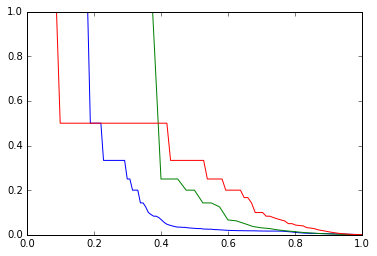

In [5]:
grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if G.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Gx=x.copy()
Gfrac=frac.copy()

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if H.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Hx=x.copy()
Hfrac=frac.copy()

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if J.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Jx=x.copy()
Jfrac=frac.copy() 

plt.plot(Gx,Gfrac)
plt.plot(Hx,Hfrac)
plt.plot(Jx,Jfrac)
plt.show()


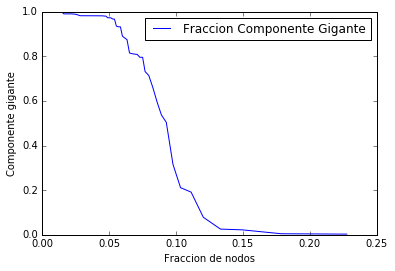

In [32]:
#Remover nodo por grado

GG=G.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1
    grados_GG = [gra for (nom,gra) in GG.degree()]
    Grados = np.asarray(grados_GG)
    I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if GG.degree[i]==np.max(Grados):
            GG.remove_node(i)
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))


plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

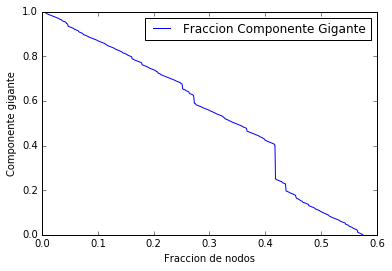

In [6]:
#remuevo nodos random

import random

GG=G.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1

    listanodos = [nom for (nom,gra) in GG.degree()]
    GG.remove_node(random.choice(listanodos))
    
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()


plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

1004
1621
1002
1620
1001
1619
1000
1618
940
1617
939
1616
937
1615
936
1614
928
1613
889
1612
886
1611
883
1610
880
1609
879
1608
876
1607
875
1606
874
874
1604
873
1603
872
1602
871
1601
868
1600
863
1599
862
1598
861
1597
841
1596
840
1595
800
1594
799
1593
798
1592
797
1591
747
1590
746
1589
745
1588
744
744
1586
743
743
1584
734
1583
732
1582
731
1581
730
1580
729
1579
728
1578
724
1577
723
1576
722
1575
721
1574
720
1573
719
1572
718
1571
713
713
1569
674
1568
666
666
1566
658
658
1564
657
1563
646
646
1561
645
1560
644
1559
522
522
522
522
1555
521
1554
512
1553
494
1552
493
493
1550
483
1549
481
1548
480
1547
479
479
1545
478
1544
477
1543
470
1542
468
468
1540
465
465
1538
464
464
464
1535
463
463
1533
462
1532
461
461
461
461
461
1527
459
1526
458
1525
455
1524
454
454
454
454
1520
448
448
448
448
448
1515
446
1514
403
1513
396
1512
392
1511
390
1510
389
389
1508
382
382
1506
347
1505
346
1504
274
1503
270
270
270
270
270
270
270
270
270
270
1493
269
1492
268
1491
267
1490
266

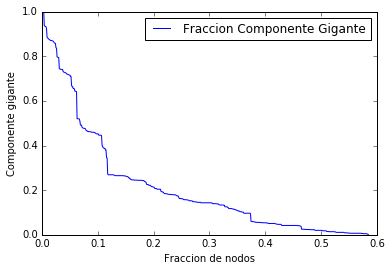

In [105]:
#CRITERIO BETWEENNESS

GG=G.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
GG=Componente_Gigante_1.copy()

bet=nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

paso=0
dg=[]
pasos=[]

nom_GG = [nom for (nom,betw) in bet.items()]
betw_GG = [betw for (nom,betw) in bet.items()]
betw = np.asarray(betw_GG)

while len(Componente_Gigante)>1:
    paso+=1
    
    if nom_GG[np.argmax(betw)] in GG.nodes():
        GG.remove_node(nom_GG[np.argmax(betw)])
        #betw = betw[betw!=np.max(betw)]
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    else:
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

1004
1003
1003
1002
1002
1001
1001
1000
1000
999
999
998
998
997
997
996
996
995
995
994
994
993
990
992
988
991
987
990
980
989
979
988
977
987
976
986
975
985
973
984
972
983
971
982
970
981
969
980
967
979
966
978
964
977
963
976
962
975
961
974
960
973
959
972
958
971
957
970
956
969
955
968
954
967
953
966
952
965
951
964
950
963
949
962
945
961
944
960
942
959
941
958
940
957
937
956
935
955
934
954
933
953
932
952
931
951
930
950
929
949
926
948
925
947
924
946
923
945
922
944
921
943
919
942
918
941
917
940
914
939
912
938
911
937
910
936
903
935
902
934
900
933
899
932
889
931
888
930
887
887
887
927
826
926
825
925
824
824
923
823
922
822
921
821
920
820
919
819
918
814
917
813
916
810
810
810
913
809
912
808
911
806
910
805
909
804
908
803
907
802
906
800
800
904
799
903
798
902
797
797
900
796
899
794
898
793
793
896
790
895
789
894
788
893
786
892
784
784
890
783
889
782
888
781
781
886
775
885
770
884
769
883
767
882
766
881
764
880
763
879
762
878
761
877
760
876
756
875

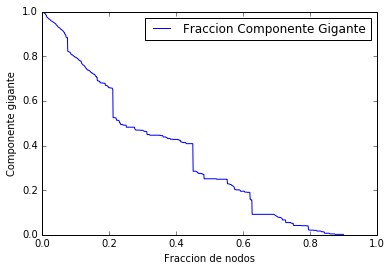

In [106]:
#CRITERIO EIGENVENTOR

GG=G.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
GG=Componente_Gigante_1.copy()

bet=nx.eigenvector_centrality(Componente_Gigante_1, max_iter=100, tol=1e-06, nstart=None, weight='weight')

paso=0
dg=[]
pasos=[]

nom_GG = [nom for (nom,betw) in bet.items()]
betw_GG = [betw for (nom,betw) in bet.items()]
betw = np.asarray(betw_GG)

while len(Componente_Gigante)>1:
    paso+=1
    
    if nom_GG[np.argmax(betw)] in GG.nodes():
        GG.remove_node(nom_GG[np.argmax(betw)])
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    else:
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

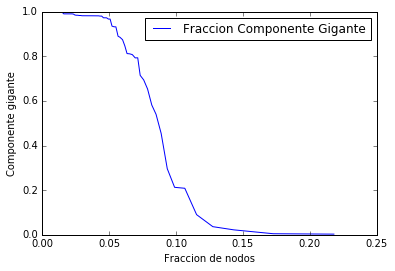

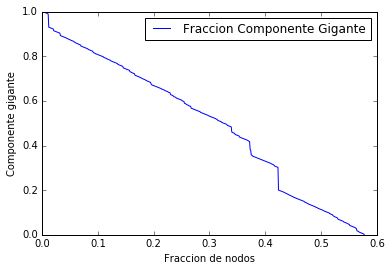

In [140]:
#RED H

#GRADO

GG=H.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1
    grados_GG = [gra for (nom,gra) in GG.degree()]
    Grados = np.asarray(grados_GG)
    I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if GG.degree[i]==np.max(Grados):
            GG.remove_node(i)
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


#RANDOM

GG=H.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1

    listanodos = [nom for (nom,gra) in GG.degree()]
    GG.remove_node(random.choice(listanodos))
    
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


#BETWEENNESS

GG=H.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
GG=Componente_Gigante_1.copy()

bet=nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

paso=0
dg=[]
pasos=[]

nom_GG = [nom for (nom,betw) in bet.items()]
betw_GG = [betw for (nom,betw) in bet.items()]
betw = np.asarray(betw_GG)

while len(Componente_Gigante)>1:
    paso+=1
    
    if nom_GG[np.argmax(betw)] in GG.nodes():
        GG.remove_node(nom_GG[np.argmax(betw)])
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    else:
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()
        
plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


#EIGENVECTOR

GG=H.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
GG=Componente_Gigante_1.copy()

bet=nx.eigenvector_centrality(Componente_Gigante_1, max_iter=100, tol=1e-06, nstart=None, weight='weight')

paso=0
dg=[]
pasos=[]

nom_GG = [nom for (nom,betw) in bet.items()]
betw_GG = [betw for (nom,betw) in bet.items()]
betw = np.asarray(betw_GG)

while len(Componente_Gigante)>1:
    paso+=1
    
    if nom_GG[np.argmax(betw)] in GG.nodes():
        GG.remove_node(nom_GG[np.argmax(betw)])
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    else:
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()
        
plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

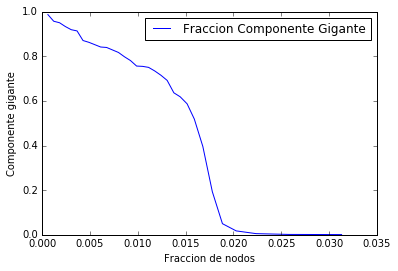

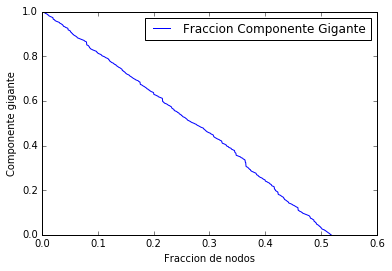

In [141]:
#RED J

#GRADO

GG=J.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1
    grados_GG = [gra for (nom,gra) in GG.degree()]
    Grados = np.asarray(grados_GG)
    I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
    for i in I.nodes(): #remuevo el nodo de mayor grado
        if GG.degree[i]==np.max(Grados):
            GG.remove_node(i)
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


#RANDOM

GG=J.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

paso=0
dg=[]
pasos=[]

while len(Componente_Gigante)>1:
    paso+=1

    listanodos = [nom for (nom,gra) in GG.degree()]
    GG.remove_node(random.choice(listanodos))
    
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()

plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


#BETWEENNESS

GG=J.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
GG=Componente_Gigante_1.copy()

bet=nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

paso=0
dg=[]
pasos=[]

nom_GG = [nom for (nom,betw) in bet.items()]
betw_GG = [betw for (nom,betw) in bet.items()]
betw = np.asarray(betw_GG)

while len(Componente_Gigante)>1:
    paso+=1
    
    if nom_GG[np.argmax(betw)] in GG.nodes():
        GG.remove_node(nom_GG[np.argmax(betw)])
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    else:
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()
        
plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()


#EIGENVECTOR

GG=J.copy()
Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
Componente_Gigante_1 = GG.subgraph(Componente_Gigante_INT)
Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
GG=Componente_Gigante_1.copy()

bet=nx.eigenvector_centrality(Componente_Gigante_1, max_iter=100, tol=1e-06, nstart=None, weight='weight')

paso=0
dg=[]
pasos=[]

nom_GG = [nom for (nom,betw) in bet.items()]
betw_GG = [betw for (nom,betw) in bet.items()]
betw = np.asarray(betw_GG)

while len(Componente_Gigante)>1:
    paso+=1
    
    if nom_GG[np.argmax(betw)] in GG.nodes():
        GG.remove_node(nom_GG[np.argmax(betw)])
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)

    else:
        del(betw_GG[np.argmax(betw)])
        del(nom_GG[np.argmax(betw)])
        betw = np.asarray(betw_GG)
        
    fraccion=len(Componente_Gigante.nodes())/len(Componente_Gigante_1.nodes())
    dg.append(fraccion)
    pasos.append(paso/len(Componente_Gigante_1.nodes()))
    GG=Componente_Gigante.copy()
        
plt.plot(pasos,dg,label="Fraccion Componente Gigante")
plt.legend()
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

Tabla 3 Zotenko

In [81]:
grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
esential=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if G.nodes[nombre[j]]['es']==1:
                ese=+1
                esential.append(G.degree())
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Gx=x.copy()
Gfrac=frac.copy()
print(esential)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [80]:
for i in G.nodes():
    if G.nodes[i]['es']==1:
        

DegreeView({'YCR024C': 2, 'YBL004W': 44, 'YNR051C': 1, 'YJR011C': 1, 'YHR110W': 1, 'YNL177C': 3, 'YNR003C': 16, 'YOR124C': 2, 'YPR180W': 1, 'YJR043C': 2, 'YDL116W': 5, 'YPL153C': 1, 'YHR119W': 6, 'YDL201W': 1, 'YER086W': 4, 'YOR075W': 6, 'YNL099C': 4, 'YGR071C': 1, 'YNL261W': 5, 'YOL068C': 1, 'YDR394W': 27, 'YLR418C': 9, 'YOL063C': 1, 'YOR290C': 10, 'YDR050C': 2, 'YLR423C': 3, 'YLR106C': 17, 'YDR301W': 14, 'YPL046C': 1, 'YMR273C': 5, 'YOR185C': 2, 'YLR186W': 39, 'YML035C': 1, 'YKR008W': 16, 'YOR304W': 11, 'YFL018C': 5, 'YJR045C': 2, 'YLR345W': 1, 'YDR188W': 7, 'YER136W': 2, 'YLL045C': 98, 'YHR012W': 4, 'YGL245W': 5, 'YDR432W': 4, 'YDL013W': 5, 'YEL058W': 1, 'YJL047C': 3, 'YLR440C': 6, 'YER117W': 2, 'YOR069W': 4, 'YKL154W': 1, 'YIL097W': 5, 'YKL181W': 1, 'YPR187W': 35, 'YOR212W': 1, 'YOL021C': 14, 'YPL010W': 6, 'YNR010W': 24, 'YJL183W': 6, 'YPR181C': 5, 'YLR410W': 1, 'YJL061W': 3, 'YER089C': 1, 'YJL011C': 14, 'YPL190C': 10, 'YGR285C': 4, 'YDL136W': 62, 'YCR066W': 1, 'YAR002W': 3, 'YDL15

In [82]:
G.nodes()

NodeView(('YCR024C', 'YBL004W', 'YML124C', 'YJR011C', 'YHR110W', 'YNL177C', 'YBR251W', 'YNR003C', 'YOR124C', 'YGL252C', 'YJR043C', 'YDL116W', 'YHR119W', 'YDL201W', 'YER086W', 'YOR075W', 'YJL164C', 'YNL099C', 'YGR071C', 'YNL261W', 'YOL068C', 'YNL096C', 'YOL070C', 'YER120W', 'YLR418C', 'YOL063C', 'YJL080C', 'YDR050C', 'YLR423C', 'YLR106C', 'YDR301W', 'YGR084C', 'YPL046C', 'YMR273C', 'YOR185C', 'YLR186W', 'YML035C', 'YKR008W', 'YCR014C', 'YFL018C', 'YJR045C', 'YKR038C', 'YDR188W', 'YER136W', 'YLL045C', 'YHR012W', 'YGL245W', 'YDR429C', 'YDR432W', 'YDL013W', 'YEL058W', 'YJL047C', 'YLR384C', 'YER117W', 'YOR069W', 'YKL154W', 'YHR085W', 'YIL097W', 'YKL181W', 'YPR187W', 'YOR212W', 'YOL021C', 'YPL010W', 'YNR010W', 'YNL172W', 'YPR181C', 'YLR410W', 'YJL061W', 'YER089C', 'YJL011C', 'YPL190C', 'YGR285C', 'YDL136W', 'YCR066W', 'YHR118C', 'YJL026W', 'YDL156W', 'YDR362C', 'YKL190W', 'YKL045W', 'YMR303C', 'YJL146W', 'YPR179C', 'YPR055W', 'YHR058C', 'YLR362W', 'YAL053W', 'YMR112C', 'YCR076C', 'YPR175W', 